In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
udf = pd.read_csv('Universities.csv', index_col='Univ')
udf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


#### Scale the data

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(udf)
#scaled_df

##### Build the model

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
model.fit(scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2])

In [8]:
udf['label'] = model.labels_

In [9]:
udf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,label
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0


#### Metric for evaluating the model

#### a. Silhouette Score
Silhouette Score is a widely used evaluation metric for clustering models in Scikit-Learn. It measures the similarity of each data point to its own cluster compared to other clusters. It returns a score between -1 and 1, where 1 indicates the best clustering and -1 indicates the worst clustering.

Here's the formula for silhouette score:

![image.png](attachment:image.png)

 
where $n$ is the number of data points, $a_i$ is the average distance between the data point $i$ and all other data points in the same cluster, and $b_i$ is the average distance between the data point $i$ and all other data points in the nearest cluster (i.e., the cluster with the minimum average distance).

The silhouette score ranges from -1 to 1. A score of 1 means that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score of 0 means that the data point is on the border between two clusters. A score of -1 means that the data point may be assigned to the wrong cluster.

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
silhouette_score(scaled_df,udf['label'])

0.29296263039983844

##### Analyse the groups

In [12]:
grp = udf.groupby('label')

In [13]:
for x,y in grp:
    print(y)
    print('_'*60)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  label
Univ                                                                 
Brown         1310     89      22       13     22704        94      0
CMU           1260     62      59        9     25026        72      0
Columbia      1310     76      24       12     31510        88      0
Cornell       1280     83      33       13     21864        90      0
Georgetown    1255     74      24       12     20126        92      0
Northwestern  1260     85      39       11     28052        89      0
NotreDame     1255     81      42       13     15122        94      0
UCBerkeley    1240     95      40       17     15140        78      0
UMichigan     1180     65      68       16     15470        85      0
UPenn         1285     80      36       11     27553        90      0
UVA           1225     77      44       14     13349        92      0
____________________________________________________________
             SAT  Top10  Acce

In [14]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
label,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [15]:
from scipy.cluster import hierarchy

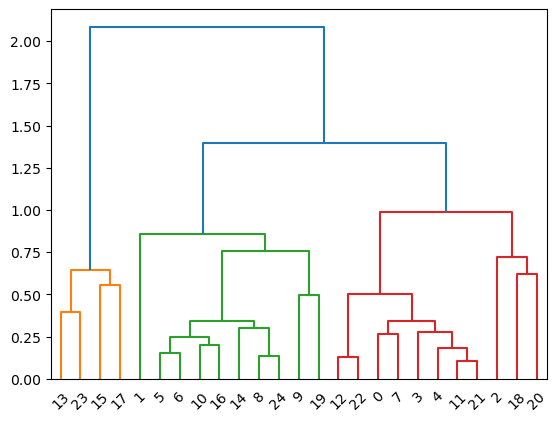

In [16]:
hr = hierarchy.linkage(scaled_df, method='complete')
dn = hierarchy.dendrogram(hr,color_threshold=1.25)

#### a. Silhouette Score
Silhouette Score is a widely used evaluation metric for clustering models in Scikit-Learn. It measures the similarity of each data point to its own cluster compared to other clusters. It returns a score between -1 and 1, where 1 indicates the best clustering and -1 indicates the worst clustering.

Here's the formula for silhouette score:


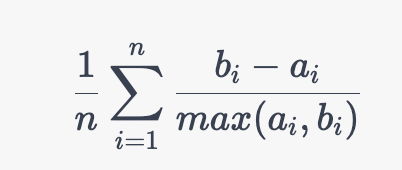

 
where $n$ is the number of data points, $a_i$ is the average distance between the data point $i$ and all other data points in the same cluster, and $b_i$ is the average distance between the data point $i$ and all other data points in the nearest cluster (i.e., the cluster with the minimum average distance).

The silhouette score ranges from -1 to 1. A score of 1 means that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score of 0 means that the data point is on the border between two clusters. A score of -1 means that the data point may be assigned to the wrong cluster.

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(scaled_df,udf['label'])

0.29296263039983844